Santiago León Salinas			| A01734958

Josue Taboada Elvira		            | A01732454

Omar Jiménez				| A01732097

Alan Eduardo Dávila			| A01731445

Juan Carlos Llanos		            | A01734916

# **1.- Preprocesamiento**

Carga de datos

In [31]:
#Importación de librerías
import pandas as pd
from pandas import Series,DataFrame
import math
from sklearn.model_selection import train_test_split
import nltk
!pip install -q wordcloud
import wordcloud
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

#Extraer los datos de csv
setInicialFake=pd.read_csv('Fake.csv')
setInicialTrue=pd.read_csv('True.csv')

# Agregar una columna 'label' para marcar los valores
setInicialFake['clasificacion'] = 0  # Marcar como 0 para fake
setInicialTrue['clasificacion'] = 1  # Marcar como 1 para true

setFake_sampled = setInicialFake.sample(n=3000, random_state=42)
setTrue_sampled = setInicialTrue.sample(n=7000, random_state=42)
#Unir los conjuntos
merged_data = pd.concat([setFake_sampled, setTrue_sampled], ignore_index=True)
# Mezclar los datos aleatoriamente
merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
setInicial_tin, setInicial_tst = train_test_split(merged_data, test_size=0.3, random_state=42)

/bin/bash: /mnt/c/Users/chito/Documents/Python/Act2.2/venv/bin/pip: /mnt/c/Users/chito/Documents/Python/Act2_2/venv/bin/python3: bad interpreter: No such file or directory


[nltk_data] Downloading package punkt to /home/sprk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sprk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Análisis de texto

In [32]:

########## Tokenización #########

vocabulary = set()

for index, row in setInicial_tin.iterrows():
    # Tokenizar el título y el texto, y agregar las palabras únicas al vocabulario
    title_tokens = word_tokenize(row['title'])
    text_tokens = word_tokenize(row['text'])
    vocabulary.update(title_tokens)
    vocabulary.update(text_tokens)

# Obtener el tamaño del vocabulario
tamanio_vocabulario = len(vocabulary)
print("Tamaño del vocabulario:", tamanio_vocabulario)

############ Lematizador ###############

lemmatizer = WordNetLemmatizer()

def extraer_lemas(txt):
    tokens = txt
    lemas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemas

lemas = extraer_lemas(vocabulary)
print(lemas)

#Extraer lemas:
lista_filtrada = list(filter(lambda palabra: palabra not in lemas, vocabulary))

tamanio_filtrado = len(lista_filtrada)
print("Tamaño del vocabulario (lista_filtrada) después de extraer lexemas:", tamanio_filtrado)

Tamaño del vocabulario: 84447
['white', 'Expedia', 'Syria.2016', 'rotting', 'ricin', 'manufacturer.Kennedy', 'Silverman', 'Ashland', '416,000', 'ScottPresler', 'coastguard', 'Swift.Then', 'Clemency', 'Kalmbach', 'Massimo', 'temperament.', 'unfathomable', 'yah', 'morning.DEOGUN', 'unmasking', 'Reckoning', 'Diocese', 'Pride', 'pic.twitter.com/tuPuhvyWVU', '875', 'retaining', 'FU', 'Lohia', 'impeding', 'Alpine', 'collective-bargaining', 'organization', 'manifesting', 'Moscow-based', "'full", 'TMS', 'tightened', 'mid-2016', 'Hunters', 'rising', 'Osman', 'misrepresent', 'hilarious.Brand', 'courteous', 'Mezvinsky', 'post-2007', 'drumbeat', 'parts.Although', 'dignity.While', 'shared.One', '35-minute', 'repudiating', 'page.I', 'parole', '607', 'Ricketts', 'RemembrancerBex', 'asserting', 'bolstering', 'dwelling', 'tarpaulin', 'Volvo', 'name.Interior', 'Joblessness', 'easily', 'NetworkJunkyz', 'Astley', 'Raasepori', 'Champions', 'weeks.Not', 'Loser', 'nervous.', 'arch', '4-', 'votes.In', 'Nenad'

Analizar la pertinencia de eliminar o no las palabras cerradas, incluir sus conclusiones

# **2.- Entrenamiento y clasificación**

## 2.1.- Representación _tf-idf_ de los documentos

### Frecuencia de términos (_tf_)

In [33]:
import numpy as np

vocabulariotf = pd.DataFrame(np.zeros((len(setInicial_tin), len(lista_filtrada))), columns=lista_filtrada)
for (index_train, row_train), (index_vocab, row_vocab) in zip(setInicial_tin.iterrows(), vocabulariotf.iterrows()):
    texto = word_tokenize(row_train.title + " " + row_train.text)
    for palabra in texto:
        if palabra in vocabulariotf.columns:
            vocabulariotf.at[index_vocab, palabra] = vocabulariotf.at[index_vocab, palabra] + 1.0
    vocabulariotf.at[index_vocab, 'clasificacion'] = setInicial_tin.at[index_train, 'clasificacion']
    
clasificacion = vocabulariotf['clasificacion']
 
vocabulariotf = vocabulariotf.drop(columns=['clasificacion']).loc[:, (vocabulariotf.drop(columns=['clasificacion']).max(axis=0) != 1)]

vocabulariotf['clasificacion'] = clasificacion

print(len(vocabulariotf.columns))
print(vocabulariotf)

vocabulario_filtrado_cantidad = vocabulariotf.columns[:-1]

print(vocabulario_filtrado_cantidad)

        

2030
      whites  coastguards  organizations  bombs  pockets  intercepts  \
0        0.0          0.0            0.0    0.0      0.0         0.0   
1        0.0          0.0            0.0    0.0      0.0         0.0   
2        0.0          0.0            0.0    0.0      0.0         0.0   
3        0.0          0.0            2.0    0.0      0.0         0.0   
4        0.0          0.0            0.0    0.0      0.0         0.0   
...      ...          ...            ...    ...      ...         ...   
6995     0.0          0.0            0.0    0.0      0.0         0.0   
6996     0.0          0.0            0.0    0.0      0.0         0.0   
6997     0.0          0.0            0.0    0.0      0.0         0.0   
6998     0.0          0.0            0.0    0.0      0.0         0.0   
6999     0.0          0.0            0.0    0.0      0.0         0.0   

      promotions  protections  elephants  accidents  ...  bothers  batteries  \
0            0.0          0.0        0.0        0.

### Frecuencia inversa del documento (_idf_)

In [34]:
vocabularioidf = pd.DataFrame(np.zeros((1, len(vocabulario_filtrado_cantidad))), columns=vocabulario_filtrado_cantidad)
for column in vocabulario_filtrado_cantidad:
    non_zero_count = (vocabulariotf[column] != 0).sum()
    if non_zero_count > 0:
        idf = np.log(len(vocabulario_filtrado_cantidad)/non_zero_count)
        vocabularioidf.at[0, column] = idf
        
print(vocabularioidf)

     whites  coastguards  organizations     bombs   pockets  intercepts  \
0  4.283094     6.516686       2.235401  3.607965  4.118791    5.418074   

   promotions  protections  elephants  accidents  ...  stations  bothers  \
0    5.312713     3.172647   6.922151   5.535857  ...  3.271493  6.00586   

   batteries  attackers      bows    toxins   rockets  stickers  hijackers  \
0   5.312713   4.319461  6.922151  6.922151  4.437245  5.669388   5.418074   

   advertisers  
0     5.050349  

[1 rows x 2029 columns]


### Ponderación _tf_ - _idf_

In [35]:
vocabulariotfidf = pd.DataFrame(np.zeros((len(setInicial_tin), len(vocabulariotf.columns))), columns=vocabulariotf.columns)
for index_vocab, row_vocab in vocabulariotfidf.iterrows():
    for column in vocabulariotfidf.columns[:-1]:
        vocabulariotfidf.at[index_vocab, column] = vocabulariotf.at[index_vocab, column] * vocabularioidf.at[0, column]
    vocabulariotfidf.at[index_vocab, 'clasificacion'] = vocabulariotf.at[index_vocab, 'clasificacion']

In [36]:
print(vocabulariotfidf)

      whites  coastguards  organizations  bombs  pockets  intercepts  \
0        0.0          0.0       0.000000    0.0      0.0         0.0   
1        0.0          0.0       0.000000    0.0      0.0         0.0   
2        0.0          0.0       0.000000    0.0      0.0         0.0   
3        0.0          0.0       4.470802    0.0      0.0         0.0   
4        0.0          0.0       0.000000    0.0      0.0         0.0   
...      ...          ...            ...    ...      ...         ...   
6995     0.0          0.0       0.000000    0.0      0.0         0.0   
6996     0.0          0.0       0.000000    0.0      0.0         0.0   
6997     0.0          0.0       0.000000    0.0      0.0         0.0   
6998     0.0          0.0       0.000000    0.0      0.0         0.0   
6999     0.0          0.0       0.000000    0.0      0.0         0.0   

      promotions  protections  elephants  accidents  ...  bothers  batteries  \
0            0.0          0.0        0.0        0.0  ..

## 2.2.- Representación binaria o conteo de los documentos

In [37]:
vocabulariobinario = pd.DataFrame(np.zeros((len(setInicial_tin), len(vocabulariotf.columns))), columns=vocabulariotf.columns)
for index_vocab, row_vocab in vocabulariobinario.iterrows():
    for column in vocabulariobinario.columns[:-1]:
        if vocabulariotf.at[index_vocab, column] > 0:
            vocabulariobinario.at[index_vocab, column] = 1
    vocabulariobinario.at[index_vocab, 'clasificacion'] = vocabulariotf.at[index_vocab, 'clasificacion']

print(vocabulariobinario)


      whites  coastguards  organizations  bombs  pockets  intercepts  \
0        0.0          0.0            0.0    0.0      0.0         0.0   
1        0.0          0.0            0.0    0.0      0.0         0.0   
2        0.0          0.0            0.0    0.0      0.0         0.0   
3        0.0          0.0            1.0    0.0      0.0         0.0   
4        0.0          0.0            0.0    0.0      0.0         0.0   
...      ...          ...            ...    ...      ...         ...   
6995     0.0          0.0            0.0    0.0      0.0         0.0   
6996     0.0          0.0            0.0    0.0      0.0         0.0   
6997     0.0          0.0            0.0    0.0      0.0         0.0   
6998     0.0          0.0            0.0    0.0      0.0         0.0   
6999     0.0          0.0            0.0    0.0      0.0         0.0   

      promotions  protections  elephants  accidents  ...  bothers  batteries  \
0            0.0          0.0        0.0        0.0  ..

## 2.3.- Algoritmo de clasificación (Árbol de Decisión)

### Empleando representación _tf-idf_

|--- https <= 1.00
|   |--- its <= -0.15
|   |   |--- talks <= 0.62
|   |   |   |--- things <= 0.69
|   |   |   |   |--- feds <= 2.49
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feds >  2.49
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- things >  0.69
|   |   |   |   |--- means <= 2.61
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- means >  2.61
|   |   |   |   |   |--- class: 0.0
|   |   |--- talks >  0.62
|   |   |   |--- media <= 3.14
|   |   |   |   |--- cares <= 1.98
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- cares >  1.98
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- media >  3.14
|   |   |   |   |--- class: 0.0
|   |--- its >  -0.15
|   |   |--- reporters <= 0.41
|   |   |   |--- things <= 0.69
|   |   |   |   |--- talks <= 0.62
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- talks >  0.62
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- things >  0.69
|   |   |   |   |--- lawmakers <= 0.60
|   |   |   |   |   |--- 

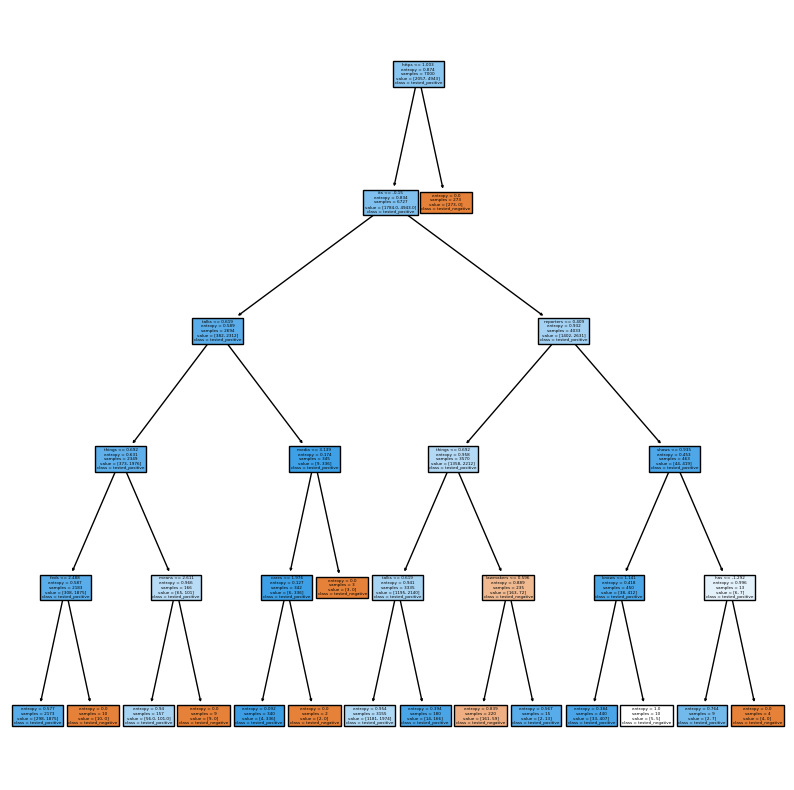

In [38]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=5)

################## Modelo ###########################
datostfidf = vocabulariotfidf[vocabulariotfidf.columns[:-1]]
clasestfidf = vocabulariotfidf[vocabulariotfidf.columns[-1]]
modelo = clasificador.fit(datostfidf, clasestfidf)

from sklearn.tree import export_text

arbol = export_text(modelo, feature_names=datostfidf.columns.to_list())
print(arbol)



import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador,feature_names=datostfidf.columns.to_list(),class_names=['tested_negative','tested_positive'],filled=True)#, rounded=True)
plt.show()

### Empleando representación binaria

|--- https <= 0.50
|   |--- its <= 0.50
|   |   |--- reporters <= 0.50
|   |   |   |--- things <= 0.50
|   |   |   |   |--- talks <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- talks >  0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- things >  0.50
|   |   |   |   |--- lawmakers <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- lawmakers >  0.50
|   |   |   |   |   |--- class: 1.0
|   |   |--- reporters >  0.50
|   |   |   |--- shows <= 0.50
|   |   |   |   |--- knows <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- knows >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- shows >  0.50
|   |   |   |   |--- days <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- days >  0.50
|   |   |   |   |   |--- class: 1.0
|   |--- its >  0.50
|   |   |--- talks <= 0.50
|   |   |   |--- things <= 0.50
|   |   |   |   |--- feds <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feds >  0.50
|   |   |   | 

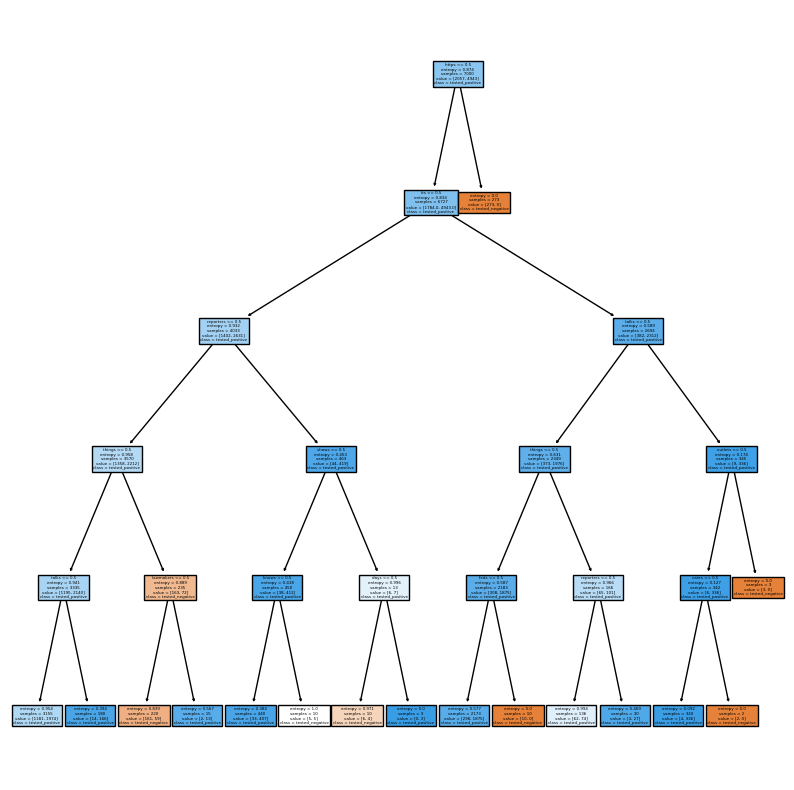

In [30]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=5)

################## Modelo ###########################
datostfidf = vocabulariobinario[vocabulariobinario.columns[:-1]]
clasestfidf = vocabulariobinario[vocabulariobinario.columns[-1]]
modelo = clasificador.fit(datostfidf, clasestfidf)

from sklearn.tree import export_text

arbol = export_text(modelo, feature_names=datostfidf.columns.to_list())
print(arbol)



import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador,feature_names=datostfidf.columns.to_list(),class_names=['tested_negative','tested_positive'],filled=True)#, rounded=True)
plt.show()

# Conclusiones

Es probable que existan diferencias significativas entre los resultados de cada representación. El TF-IDF otorga más peso a las palabras raras en el corpus pero frecuentes en un documento específico, mientras que la representación de conteo simplemente cuenta la frecuencia de ocurrencia de cada palabra. Estas diferencias pueden afectar el rendimiento del modelo de clasificación.

Los experimentos pueden ubicarse en distintos cuadrantes del diagrama según el comportamiento de las métricas de precisión y exhaustividad. Idealmente, deseamos que los experimentos estén en el cuadrante superior derecho, indicando altos valores de precisión y exhaustividad. Sin embargo, algunos experimentos pueden estar en otros cuadrantes, señalando un desequilibrio entre precisión y exhaustividad.

Es posible identificar palabras que aparecen más frecuentemente en noticias falsas que en noticias reales mediante técnicas de análisis de texto como TF-IDF o la matriz de conteo de palabras. Estas palabras pueden ser indicadores importantes para detectar noticias falsas, aunque es importante considerar que algunas palabras pueden ser comunes en ambos tipos de noticias.

La matriz de confusión es útil para profundizar en el análisis del rendimiento del modelo de clasificación. Además de calcular métricas como precisión, exhaustividad y F1-score, la matriz de confusión permite visualizar cómo el modelo clasifica las instancias en cada clase y cómo se distribuyen los errores de clasificación. Esto puede brindar información valiosa sobre las fortalezas y debilidades del modelo, así como áreas específicas que podrían necesitar más atención durante el ajuste del modelo.

In [39]:
%%bash
jupyter nbconvert --to html Act2_2_AnalisisdeTexto.ipynb

bash: /mnt/c/Users/chito/Documents/Python/Act2.2/venv/bin/jupyter: /mnt/c/Users/chito/Documents/Python/Act2_2/venv/bin/python: bad interpreter: No such file or directory


CalledProcessError: Command 'b'jupyter nbconvert --to html Act2_2_AnalisisdeTexto.ipynb\n'' returned non-zero exit status 126.